In [289]:
import requests
from bs4 import BeautifulSoup 

In [290]:
US_presidents = requests.get('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')

In [291]:
US_presidents.status_code

200

In [292]:
#US_presidents.content

In [293]:
soup = BeautifulSoup(US_presidents.text, 'html')

In [294]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of presidents of the United States - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vec

In [295]:
table = soup.find('table')

In [296]:
titles = table.find_all(scope = 'col')

In [400]:
table_tit = [title.get_text().strip() for title in titles][2:]

table_tit[1] = table_tit[1][:-4]
table_tit[2] = table_tit[2][:-7]
table_tit[4] = table_tit[4][:-4]
table_tit

['Name(Birth–Death)', 'Term', 'Party', 'Election', 'Vice President']

In [298]:
import pandas as pd

In [334]:
Full_data_on_Presidents = pd.DataFrame(columns = table_tit)

In [335]:
column_data = table.find_all('tr')

In [336]:
presidencies = []
start_date_formatted = []
end_date_formatted = []

In [378]:

from datetime import datetime

if(len(Full_data_on_Presidents) != 46):#this stops the data frame from being populated when it already has the data
    for row in column_data[1:]:
        row_data = row.find_all('td') #td is the tag for all the data in the rows
        individual_data = [data.get_text().strip() for data in row_data if data.get_text().strip()]
        
        individual_data[0] = individual_data[0][:-4]
        individual_data[1] = individual_data[1].replace("[e]", " ").replace("[h]", " ").replace("[p]", " ").replace("[i]", " ").replace("[o]", " ").replace("[k]", " ").replace("[m]", " ").replace("[q]", " ").replace("[r]", " ").replace("[u]", " ").replace("[s]", " ")
        start_date_str, end_date_str = individual_data[1].split('–')
        
        start_date = datetime.strptime(start_date_str.strip(), "%B %d, %Y")
        # Handle the "Incumbent" case
        if end_date_str.strip() == "Incumbent":
            end_date = datetime.now()
        else:
            end_date = datetime.strptime(end_date_str.strip(), "%B %d, %Y")

        start_date_formatted.append(start_date.strftime("%Y-%m-%d"))
        end_date_formatted.append(end_date.strftime("%Y-%m-%d"))
        individual_data[2] = individual_data[2].replace("\n\n", " and ").replace("[f]", " ").replace("[n]", " ").replace("[l]", " ").replace("[j]", " ")
        individual_data[3] = individual_data[3].replace("\n\n", " and ")
        individual_data[3] = individual_data[3].replace("\n", " ")
        individual_data[4] = individual_data[4].replace("\n\n", " and ").replace("[c]", " ").replace("[d]", " ").replace("[h]", " ").replace("[e]", " ").replace("\n", " ").replace("[g]", " ").replace("[t]", " ")
    
        Full_data_on_Presidents.loc[len(Full_data_on_Presidents)] = individual_data

In [381]:
Full_data_on_Presidents['Start date'] =start_date_formatted 
Full_data_on_Presidents['End date'] =end_date_formatted 

#convertint the start dates and end dates to date time objects
Full_data_on_Presidents['End date'] = pd.to_datetime(Full_data_on_Presidents['End date'])
Full_data_on_Presidents['Start date'] = pd.to_datetime(Full_data_on_Presidents['Start date'])
Full_data_on_Presidents['Term Duration'] = Full_data_on_Presidents['End date'] - Full_data_on_Presidents['Start date']

In [382]:
#1. Scrap the data of all presidents from the table on this web page and store the data into a python dataframe for analysis. 

Full_data_on_Presidents

,Name(Birth–Death),Term,Party,Election,Vice President,Start date,End date,Term Duration
0,George Washington(1732–1799),"April 30, 1789–March 4, 1797",Unaffiliated,1788–1789 and 1792,John Adams,1789-04-30,1797-03-04,2865 days
1,John Adams(1735–1826),"March 4, 1797–March 4, 1801",Federalist,1796,Thomas Jefferson,1797-03-04,1801-03-04,1460 days
2,Thomas Jefferson(1743–1826),"March 4, 1801–March 4, 1809",Democratic-Republican,1800 and 1804,Aaron Burr and George Clinton,1801-03-04,1809-03-04,2922 days
3,James Madison(1751–1836),"March 4, 1809–March 4, 1817",Democratic-Republican,1808 and 1812,"George Clinton and Vacant afterApril 20, 1812...",1809-03-04,1817-03-04,2922 days
4,James Monroe(1758–1831),"March 4, 1817–March 4, 1825",Democratic-Republican,1816 and 1820,Daniel D. Tompkins,1817-03-04,1825-03-04,2922 days
5,John Quincy Adams(1767–1848),"March 4, 1825–March 4, 1829",Democratic-Republican and National Republican,1824,John C. Calhoun,1825-03-04,1829-03-04,1461 days
6,Andrew Jackson(1767–1845),"March 4, 1829–March 4, 1837",Democratic,1828 and 1832,"John C. Calhoun and Vacant afterDecember 28, ...",1829-03-04,1837-03-04,2922 days
7,Martin Van Buren(1782–1862),"March 4, 1837–March 4, 1841",Democratic,1836,Richard Mentor Johnson,1837-03-04,1841-03-04,1461 days
8,William Henry Harrison(1773–1841),"March 4, 1841–April 4, 1841",Whig,1840,John Tyler,1841-03-04,1841-04-04,31 days
9,John Tyler(1790–1862),"April 4, 1841 –March 4, 1845",Whig and Unaffiliated,–,Vacant throughoutpresidency,1841-04-04,1845-03-04,1430 days


In [383]:
presidencies = Full_data_on_Presidents.iloc[:,0] #this stores the data on the presidency seats they have had in the US

In [384]:
# Split the 'Vice President' column values by 'and' and flatten the list
vice_presidents = Full_data_on_Presidents['Vice President'].str.split(' and ').explode().str.strip()

# Get unique vice presidents
distinct_vice_presidents = vice_presidents.dropna().unique()

# Convert to list
distinct_vice_presidents_list = distinct_vice_presidents.tolist()

In [385]:
# Extracting birth years from the list
birth_and_death = []

for p in presidencies:
    birth_and_death.append(p.split('(')[1][:-1]) #this gives me the years that they were born and died and removes the last parenthesis
    
birth_years = []
for bd in birth_and_death:
    if 'b.' in bd:
        birth_year = int(bd.split('b. ')[1])
    else:
        birth_year = int(bd.split('–')[0])
    birth_years.append(birth_year)

In [386]:
names_of_presidents = []
for p in presidencies:
    names_of_presidents.append(p.split('(')[0])  

In [387]:
#2. How many presidents are on the web page?
distinct_president = []

for p in presidencies:
    if p.split('(')[0] not in distinct_president:
        distinct_president.append(p.split('(')[0]) #this gives me the names of each distinct president

        
print("There are " + str(len(distinct_president))+ " presidents on the webpage")

There are 45 presidents on the webpage


In [388]:
# 3. How many presidencies have ever existed in the United States?
print("There are " + str(len(presidencies))+ " presidencies that have ever existed in the United States")

There are 46 presidencies that have ever existed in the United States


In [389]:
# 4. Which presidents served more than one term and had only one vice president for the whole duration of their presidency?
presidents_multiple_terms_one_vp = Full_data_on_Presidents[((((Full_data_on_Presidents['End date']) - (Full_data_on_Presidents['Start date'])).dt.days) > 1461)&
((Full_data_on_Presidents['Vice President'].str.contains('Vacant') &( Full_data_on_Presidents['Vice President'].str.count('and') == 1 )) |
 (Full_data_on_Presidents['Vice President'].str.count('and') == 0 ))]

# Display the results
print(presidents_multiple_terms_one_vp[['Name(Birth–Death)', 'Term', 'Vice President']])

                  Name(Birth–Death)                                 Term  \
0      George Washington(1732–1799)         April 30, 1789–March 4, 1797   
4           James Monroe(1758–1831)          March 4, 1817–March 4, 1825   
25    Theodore Roosevelt(1858–1919)    September 14, 1901 –March 4, 1909   
27        Woodrow Wilson(1856–1924)          March 4, 1913–March 4, 1921   
29       Calvin Coolidge(1872–1933)        August 2, 1923 –March 4, 1929   
32       Harry S. Truman(1884–1972)     April 12, 1945 –January 20, 1953   
33  Dwight D. Eisenhower(1890–1969)    January 20, 1953–January 20, 1961   
35     Lyndon B. Johnson(1908–1973)  November 22, 1963 –January 20, 1969   
39         Ronald Reagan(1911–2004)    January 20, 1981–January 20, 1989   
41            Bill Clinton(b. 1946)    January 20, 1993–January 20, 2001   
42          George W. Bush(b. 1946)    January 20, 2001–January 20, 2009   
43            Barack Obama(b. 1961)    January 20, 2009–January 20, 2017   

           

In [390]:
#5. Which president was in office longer than others and when did he get in office?

# Find the president with the longest term duration
longest_serving_president = Full_data_on_Presidents.loc[Full_data_on_Presidents['Term Duration'].idxmax()]


print("The president who served the longest term was:", longest_serving_president['Name(Birth–Death)'])
print("He served for", (longest_serving_president['Election'].count("and")+1), "terms")
print("He got into office on:", longest_serving_president['Start date'])
print("He served during:", longest_serving_president['Election'])


The president who served the longest term was: Franklin D. Roosevelt(1882–1945)
He served for 4 terms
He got into office on: 1933-03-04 00:00:00
He served during: 1932 and 1936 and  1940 and  1944


In [391]:
#6. Which presidents were elected after serving as vice presidents ?

# Filter the DataFrame for vice presidents who later became presidents
vice_presidents_who_became_presidents = Full_data_on_Presidents[Full_data_on_Presidents['Name(Birth–Death)'].apply(lambda x: any(vp in x for vp in distinct_vice_presidents_list))]

# Extract and print the required information
for index, row in vice_presidents_who_became_presidents.iterrows():
    name = row['Name(Birth–Death)'].split('(')[0]
    vice_president_periods = Full_data_on_Presidents[Full_data_on_Presidents['Vice President'].str.contains(name)]
    president_periods = Full_data_on_Presidents[Full_data_on_Presidents['Name(Birth–Death)'].str.contains(name)]
    
    print(f"{name.split('(')[0]} served as Vice President during the periods:")
    for idx, vp_period in vice_president_periods.iterrows():
        print(f"  {vp_period['Start date'].year} to {vp_period['End date'].year}")
    
    print(f"{name.split('(')[0]} served as President during the periods:")
    for idx, pres_period in president_periods.iterrows():
        print(f"  {pres_period['Start date'].year} to {pres_period['End date'].year}")
    
    print()  # Add a blank line for better readability#
#vice_presidents_who_became_presidents

John Adams served as Vice President during the periods:
  1789 to 1797
John Adams served as President during the periods:
  1797 to 1801

Thomas Jefferson served as Vice President during the periods:
  1797 to 1801
Thomas Jefferson served as President during the periods:
  1801 to 1809

Martin Van Buren served as Vice President during the periods:
  1829 to 1837
Martin Van Buren served as President during the periods:
  1837 to 1841

John Tyler served as Vice President during the periods:
  1841 to 1841
John Tyler served as President during the periods:
  1841 to 1845

Millard Fillmore served as Vice President during the periods:
  1849 to 1850
Millard Fillmore served as President during the periods:
  1850 to 1853

Andrew Johnson served as Vice President during the periods:
  1861 to 1865
Andrew Johnson served as President during the periods:
  1865 to 1869

Chester A. Arthur served as Vice President during the periods:
  1881 to 1881
Chester A. Arthur served as President during the p

In [392]:
#7
presidents_never_elected = Full_data_on_Presidents[(Full_data_on_Presidents['Election'] == '–')]
# Print the total number of presidents who were never elected
print(f"They are a total of {len(presidents_never_elected)} presidents who were never elected:")

# Loop through the DataFrame to print the details neatly
for index, row in presidents_never_elected.iterrows():
    name = row['Name(Birth–Death)']
    term = row['Term']
    print(f"Name: {name}, Term: {term}")

They are a total of 5 presidents who were never elected:
Name: John Tyler(1790–1862), Term: April 4, 1841 –March 4, 1845
Name: Millard Fillmore(1800–1874), Term: July 9, 1850 –March 4, 1853
Name: Andrew Johnson(1808–1875), Term: April 15, 1865 –March 4, 1869
Name: Chester A. Arthur(1829–1886), Term: September 19, 1881 –March 4, 1885
Name: Gerald Ford(1913–2006), Term: August 9, 1974 –January 20, 1977


In [393]:
# Create a new DataFrame
presidents_info = pd.DataFrame({
    'Name': names_of_presidents,
    'Start date': Full_data_on_Presidents['Start date'],
    'End date': Full_data_on_Presidents['End date'],
    'Birth Year': birth_years
})

# Extract start years from 'Start date' column
presidents_info['Start Year'] = (presidents_info['Start date']).dt.year

# Calculate age at election
presidents_info['Age at Election'] = presidents_info['Start Year'] - presidents_info['Birth Year']

# Calculate duration of presidency
presidents_info['Duration'] = ((presidents_info['End date']) - (presidents_info['Start date'])).dt.days

In [394]:
# 8 How many presidents have the same forenames and/or surnames and who are they ? 
# Extract first names
presidents_info['First Name'] = presidents_info['Name'].apply(lambda x: x.split()[0])
presidents_info['Last Name'] = presidents_info['Name'].apply(lambda x: x.split()[-1])

# Group by first names
grouped_by_first_name = presidents_info.groupby('First Name')

# Iterate over each group
for name, group in grouped_by_first_name:
    if len(group) > 1:  # Check if there are multiple presidents with the same first name
        print()
        print(f"Presidents with the same first name '{name}':")
        for idx, row in group.iterrows():
            print(f"{row['Name']} served from {row['Start date'].year} to {row['End date'].year}")   


grouped_by_last_name = presidents_info.groupby('Last Name')
print()
# Iterate over each group
for name, group in grouped_by_last_name:
    if len(group) > 1:  # Check if there are multiple presidents with the same first name
        print()
        print(f"Presidents with the same last name '{name}':")
        for idx, row in group.iterrows():
            print(f"{row['Name']} served from {row['Start date'].year} to {row['End date'].year}")   


Presidents with the same first name 'Andrew':
Andrew Jackson served from 1829 to 1837
Andrew Johnson served from 1865 to 1869

Presidents with the same first name 'Franklin':
Franklin Pierce served from 1853 to 1857
Franklin D. Roosevelt served from 1933 to 1945

Presidents with the same first name 'George':
George Washington served from 1789 to 1797
George H. W. Bush served from 1989 to 1993
George W. Bush served from 2001 to 2009

Presidents with the same first name 'Grover':
Grover Cleveland served from 1885 to 1889
Grover Cleveland served from 1893 to 1897

Presidents with the same first name 'James':
James Madison served from 1809 to 1817
James Monroe served from 1817 to 1825
James K. Polk served from 1845 to 1849
James Buchanan served from 1857 to 1861
James A. Garfield served from 1881 to 1881

Presidents with the same first name 'John':
John Adams served from 1797 to 1801
John Quincy Adams served from 1825 to 1829
John Tyler served from 1841 to 1845
John F. Kennedy served from

In [395]:
#9. Who was the oldest president ever elected for office ?

# Find the oldest president at election
oldest_president = presidents_info.loc[presidents_info['Age at Election'].idxmax()]

print(f"The oldest president elected was {oldest_president['Name']} at the age of {oldest_president['Age at Election']}.")
print(f"He was elected in {oldest_president['Start Year']} and served until {(oldest_president['End date']).year}.")
print(f"Duration of his presidency was {oldest_president['Duration']} days currently.")

The oldest president elected was Joe Biden at the age of 79.
He was elected in 2021 and served until 2024.
Duration of his presidency was 1227 days currently.


In [396]:
#10 Who was the youngest president ever elected for office ?
# Find the oldest president at election
youngest_president = presidents_info.loc[presidents_info['Age at Election'].idxmin()]

print(f"The youngest president elected was {youngest_president['Name']} at the age of {youngest_president['Age at Election']}.")
print(f"He was elected in {youngest_president['Start Year']} and served until {(youngest_president['End date']).year}.")
print(f"Duration of his presidency was {youngest_president['Duration']} days.")

The youngest president elected was Theodore Roosevelt at the age of 43.
He was elected in 1901 and served until 1909.
Duration of his presidency was 2728 days.


In [397]:
# 11. Which president lived up to a very old age, after leaving office ?
presidents_info['Age after office'] = ((presidents_info['End date']).dt.year - presidents_info['Birth Year'])
longest_lived = presidents_info.loc[presidents_info['Age after office'].idxmax()]
longest_lived

print(f"The president that lived up to a very old age is {longest_lived['Name']}, who was elected at the age of {longest_lived['Age at Election']}.")
print(f"He was elected in {longest_lived['Start Year']}")
print(f"Duration of his presidency was {longest_lived['Duration']} days at the moment.")

The president that lived up to a very old age is Joe Biden, who was elected at the age of 79.
He was elected in 2021
Duration of his presidency was 1227 days at the moment.


In [398]:
#creating a list of all the the parties for the president
parties = []

# Loop through the 'Party' column
for party in Full_data_on_Presidents['Party']:
    if 'and' in party:
        split_parties = party.split(' and ')
        parties.extend(split_parties)
    else:
        parties.append(party)

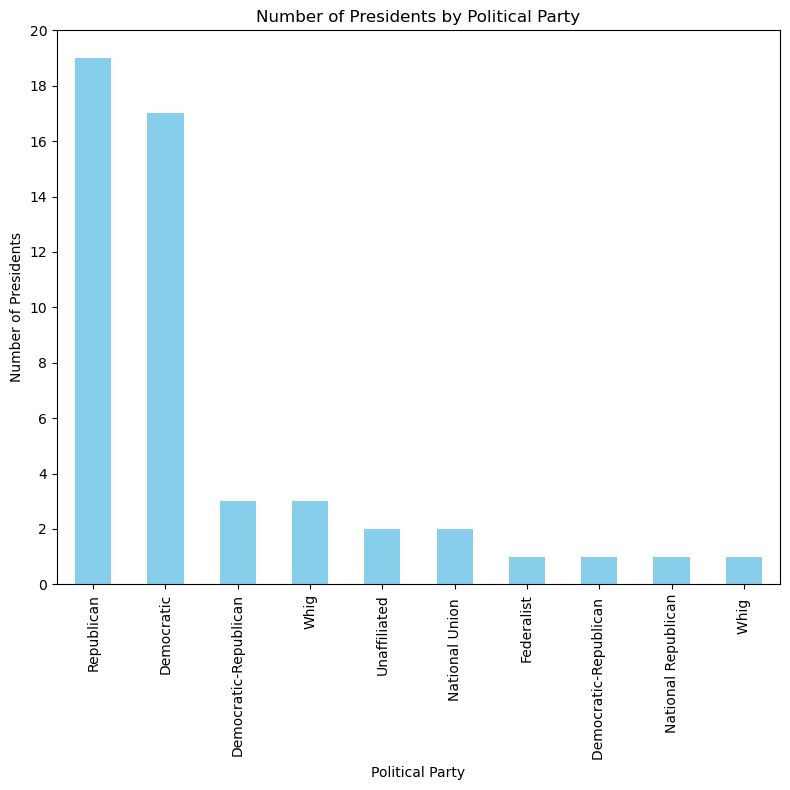

The political party with the most elected presidents is the Republican party with 19 presidents.


In [399]:
#12. Draw a graph that shows the number of presidents and their respective political parties which they came from, and which party have many elected presidents ?
import matplotlib.pyplot as plt

# Count the number of presidents from each political party
party_counts = pd.Series(parties).value_counts()

# Plot the data
plt.figure(figsize=(8, 8))
party_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Presidents by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Number of Presidents')
plt.yticks(range(0, max(party_counts)+2, 2))
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Determine the party with the most elected presidents
most_elected_party = party_counts.idxmax()
most_elected_count = party_counts.max()

print(f"The political party with the most elected presidents is the {most_elected_party} party with {most_elected_count} presidents.")